In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_isna = df.isna().sum()
df_isna[df_isna > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# 1. Deleting columns with most unique values

In [6]:
df_str = df.copy()
for i in df_str.columns:
    df_str[i] = df_str[i].apply(lambda x: str(x))
df_str.replace('nan',np.nan,inplace=True)

df_str.describe(include='object').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
PassengerId,891,891,1,1
Name,891,891,"Braund, Mr. Owen Harris",1
Ticket,891,681,347082,7
Fare,891,248,8.05,43
Cabin,204,147,B96 B98,4
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644


In [7]:
df = df.drop(columns=[
    # too many unique values
    'PassengerId','Name','Ticket',
    # too many null values
    'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_str = df.copy()
for i in df_str.columns:
  df_str[i] = df_str[i].apply(lambda x:str(x))
df_str.replace('nan',np.nan,inplace=True)

df_unique = df_str.describe(include='object').T.sort_values(by='unique',ascending=False)
df = df[df_unique.index]
df_unique

,count,unique,top,freq
Fare,891,248,8.05,43
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644
Survived,891,2,0,549
Sex,891,2,male,577


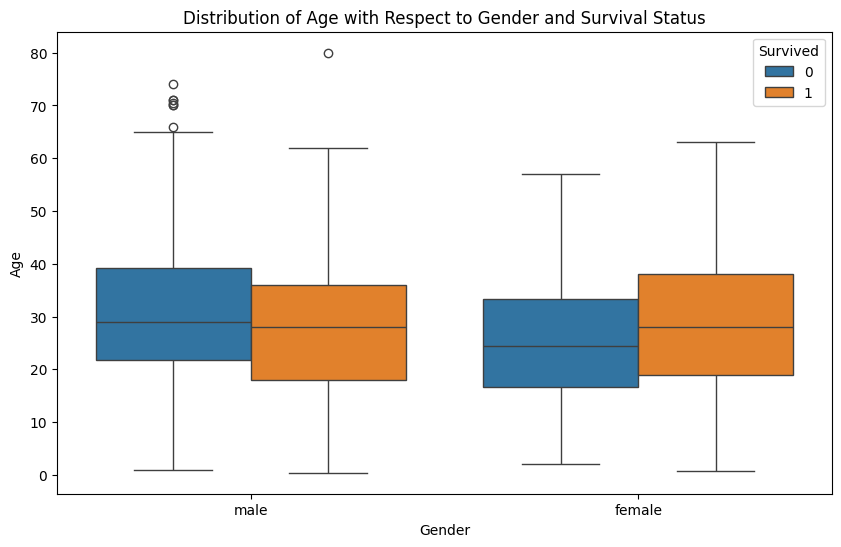

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Distribution of Age with Respect to Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

From the box plot showing the distribution of age with respect to gender and survival status on the Titanic, we can make the following inferences:

Age Distribution by Gender:
The median age for both males and females appears to be similar, with females showing slightly lower median age compared to males.
The age range for females seems to be slightly wider than that for males, as indicated by the length of the boxes (interquartile range).

Effect of Survival Status:
For both males and females, the median age of survivors (indicated by the orange box) appears to be lower than that of non-survivors (indicated by the blue box), suggesting that younger passengers were more likely to survive.
The upper whisker (75th percentile) for survivors tends to be shorter than that for non-survivors, indicating that the age distribution of survivors tends to have a tighter spread.

Outliers:
There are a few outliers present in the age distribution for both males and females, particularly among non-survivors. These outliers represent passengers who were significantly older than the rest of the group.

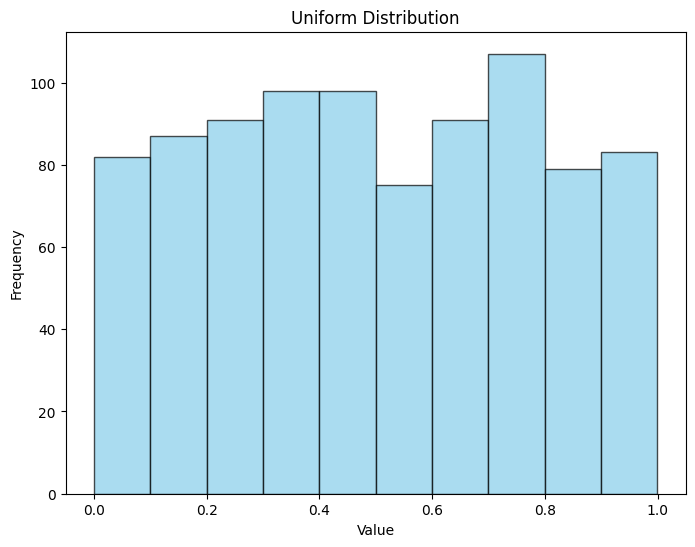

Mean of Survivors: 0.3838383838383838


In [10]:
mean_survivors = np.mean(df.Survived)

# Generate a uniform distribution
uniform_distribution = np.random.uniform(low=0, high=1, size=len(df.Survived))

# Plot the uniform distribution
plt.figure(figsize=(8, 6))
plt.hist(uniform_distribution, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

print("Mean of Survivors:", mean_survivors)

Text(0.5, 1.0, 'Scatter plot for survival by Gender')

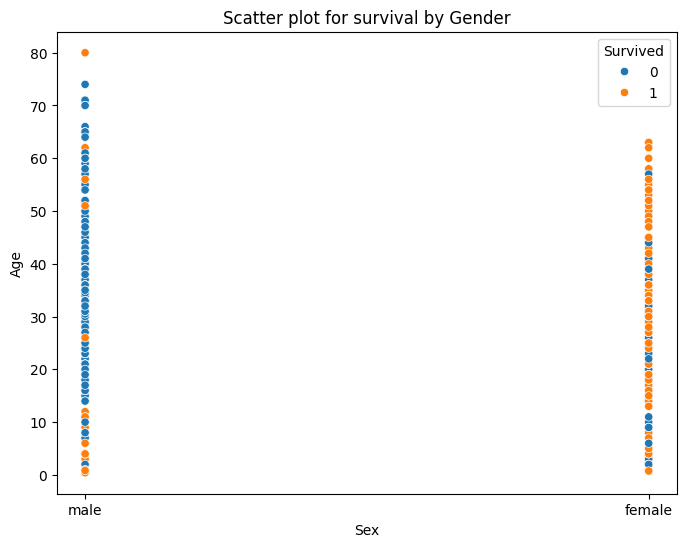

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x='Sex', y='Age', data=df, hue='Survived')

plt.title('Scatter plot for survival by Gender')

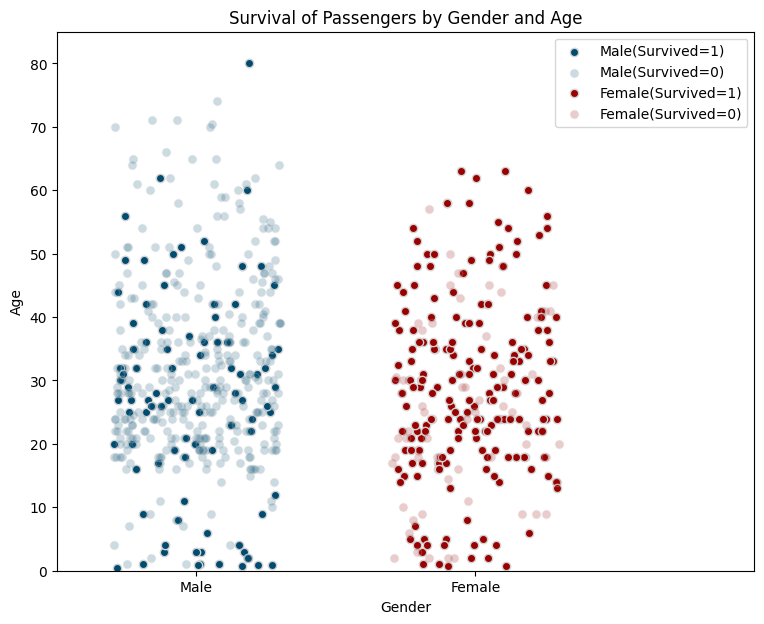

In [12]:
male_pos = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Age']
male_neg = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]['Age']
female_pos = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Age']
female_neg = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]['Age']

fig, ax = plt.subplots(1, 1, figsize=(9, 7))
np.random.seed(42)

ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

ax.set_xlim(-0.5, 2)
ax.set_ylim(0, 85)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])
ax.set_yticks(range(0, 85, 10))

ax.legend(loc='upper right')
ax.set_title('Survival of Passengers by Gender and Age')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')

plt.show()